FIAP - Tecnólogo de Inteligência Artificial

# Machine Learning & Modelling - Checkpoint #2 e Checkpoint #3 

Faça _individualmente_ a lista abaixo para praticar análise descritiva, gráficos e regressão linear. Utilize os conceitos vistos em sala, os notebooks disponíveis e consulte documentações de Python na Internet. Em caso de dúvidas, contate o Prof. Michel. 

**Entrega**: 26/maio/2022, via Teams - IMPORTANTE: renomeie o notebook incluindo seu nome! 



## Dataset

O dataset mapeia características de pessoas cruzando com o valor pago pelo seu seguro de saúde nos EUA. Os dados são compostos pelas seguintes variáveis: 

- `age` : idade do indivíduo 
- `sex` : sexo do indivíduo 
- `bmi` : "Body mass index", o IMC (índice de massa corporal)
- `children` : número de filhos
- `smoker` : fumante ou não?
- `region` : região de residência da pessoa
- `charges` : tarifa paga pela pessoa

Os dados podem ser lidos diretamente a partir desta URL: https://tinyurl.com/42rvaw4p


## Atividades 

A partir da leitura do dataset, realize as seguintes tarefas: 

### Gerais (CK #2)

1. Faça uma análise descritiva geral dos dados, para se familirizar com o dataset 

### Gráficos (CK #2)

Lembrem-se! Todo gráfico precisa ter um título, o nome do Eixo X e do Eixo Y! Estas alterações nos gráficos são **obrigatórias**. Outras alterações de layout são bem-vindas, e podem gerar nota extra ;D

2. Faça um histograma com as idades das pessoas
3. Faça uma gráfico com a distribuição das pessoas por sexo
4. Faça um boxplot de gastos por região. Cada região deve estar em um boxplot distinto 
5. Faça um gráfico de dispersão (scatter plot) de BMI (eixo X) e Charges (eixo Y). Defina a cor dos pontos pela variável "sex"
6. Faça um pairplot (da biblioteca seaborn) de todas as variáveis. Defina a cor (parâmetro _hue_ ) em função da variável smoker. Observando especialmente os gráficos da linha ou coluna das tarifas (charges), quais são suas principais conclusões? 


### Filtros de dataframes (CK #3)

7. Faça um dataframe menor selecionamento apenas selecionando as pessoas que pagam acima do valor médio da tarifa. Descreva o perfil destas pessoas em termos de suas variáveis: ou seja, possuem quantos filhos? qual a idade média? são geralmente os homens ou as mulheres? etc. 
8. Verifique quantas pessoas existem abaixo dos 30 anos E que são fumantes


### Regressão linear (CK #3)

9. Padronize as features do dataset 
10. Execute uma regressão linear simples usando todas as features (o label é o valor pago do seguro). Calcule o `R2 score` e interprete o valor desta métrica

### Importação das bibliotecas e dos dados

In [205]:
# Apenas para evitar warnings 
import warnings
warnings.filterwarnings('ignore')

# Bibliotecas de Data Science
from urllib.request import urlopen
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Separação dos dados
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [206]:
seguro = pd.read_csv('https://tinyurl.com/42rvaw4p')

#### Histograma por idades das pessoas da amostra

Text(0.5, 0, 'Média de idades')

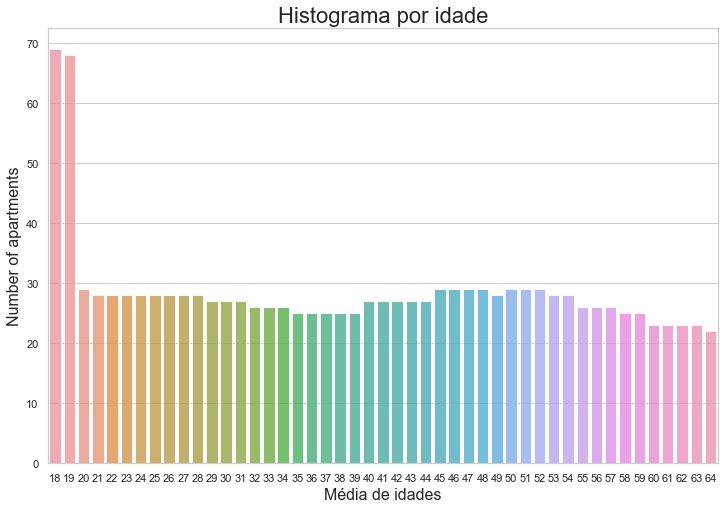

In [207]:
plt.figure(figsize = (12,8))
ax = sns.countplot(x = 'age', data = seguro, alpha = 0.8)
ax.set_title('Histograma por idade', fontsize = 22)
ax.set_ylabel('Number of apartments', fontsize = 16)
ax.set_xlabel('Média de idades', fontsize = 16)

#### Visualização gráfica de distribuição de pessoas por gênero

Text(0.5, 0, 'Gênero')

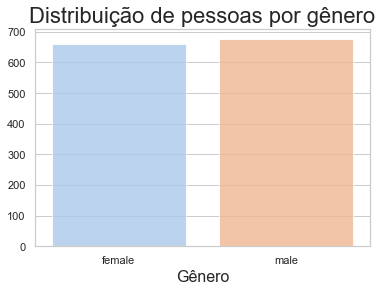

In [213]:
ax = sns.countplot(x = 'sex', data = seguro, palette="pastel", alpha = 0.8)
ax.set_title('Distribuição de pessoas por gênero', fontsize = 22)
ax.set_ylabel('', fontsize = 1)
ax.set_xlabel('Gênero', fontsize = 16)

#### Plotando o boxplot das regiões em relação aos gastos

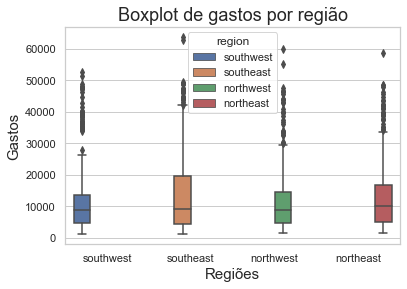

In [214]:
ax = sns.boxplot(x="region", y="charges", data=seguro, hue='region')

plt.title("Boxplot de gastos por região", loc="center", fontsize=18)
plt.xlabel("Regiões", fontsize=15)
plt.ylabel("Gastos", fontsize=15)

plt.show()

#### Grafico de dispersão do IMC e gastos por região, os pontos indicão o sexo de cada individuo


Text(0, 0.5, 'Tarifa paga por individuo')

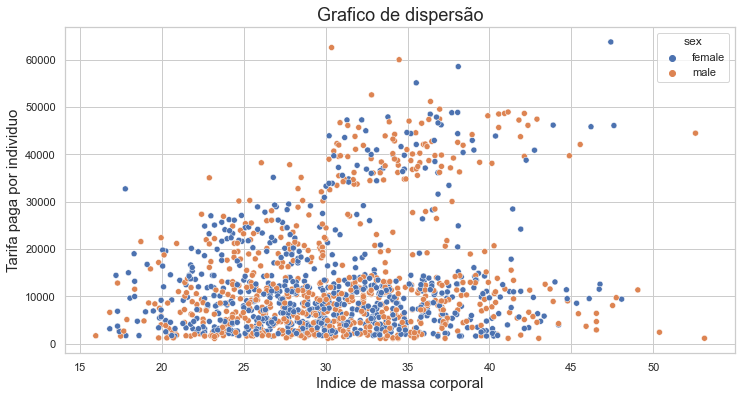

In [215]:
plt.figure(figsize =(12, 6))
sns.scatterplot(data=seguro, x="bmi", y="charges", hue="sex")
plt.title('Grafico de dispersão', fontsize=18)
plt.xlabel('Indice de massa corporal', fontsize=15)
plt.ylabel('Tarifa paga por individuo', fontsize=15)

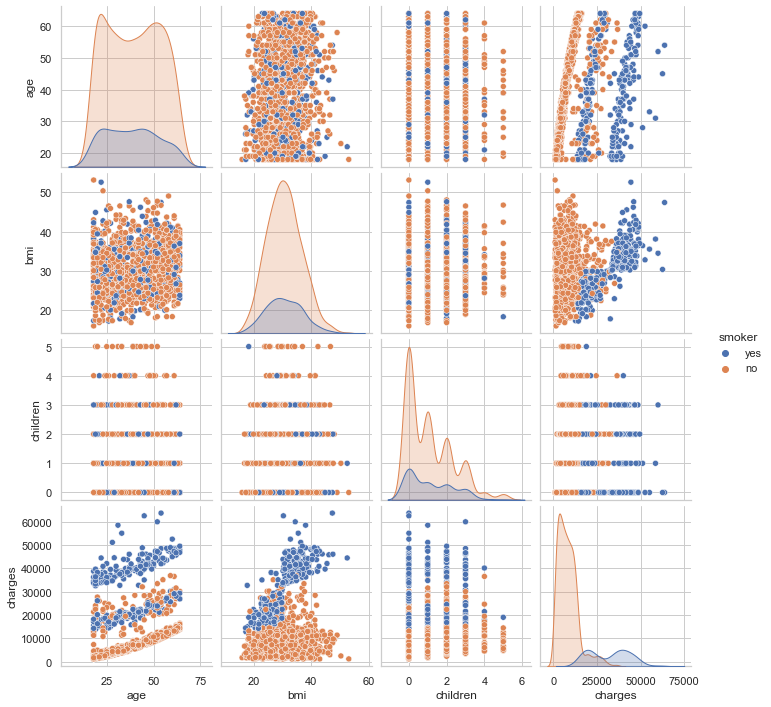

In [216]:
sns.pairplot(seguro, hue="smoker")

In [217]:
seguro.shape

(1338, 7)

#### Exibição das informações do dataset sem dados nulos ou faltantes

In [218]:
seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Removendo informações duplicadas caso tivessemos em nosso dataset

In [219]:
seguro.drop_duplicates(inplace=True)

#### Remove dados faltantes se tivessemos nessa amostra

In [220]:
seguro.dropna(inplace=True)

#### Exibição dos valores estatísticos

In [221]:
seguro.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


In [222]:
seguro.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Analise dos indivíduos que pagam tarifa acima da média:

Ao filtrar o dataset, foram encontrado 420 indivíduos que pagam tarifa acima da média, desse total, 221 indivíduos são do gênero Masculino, 80 tem 1 ou mais filhos, somando um total de 148 crianças.
Para indivíduos do gênero Feminino temos uma quantidade menor dos que pagam a tarifa acima da média, são cerca de 199 pessoas, 70 delas tem filhos, somando um total de 130 crianças.
Concluindo que, apesar de haver uma pequena diferença entre os generos, homem são os que pagam tarifas maiores e tem mais filhos.

#### Exibição da média de gastos com tarifas

In [223]:
print(f'Média dos gastos com tarifas: {seguro["charges"].mean()}')

Média dos gastos com tarifas: 13279.121486655948


#### Exibição dos indivíduos que pagam tarifa acima da média

In [224]:
seguro_media = seguro[(seguro['charges'] >= 13270.422265141257) & (seguro['sex'])]

#### Removendo as colunas que não serão utilizadas

In [225]:
seguro_media = seguro_media.drop(columns = ["smoker", "region", "bmi"])

#### Exibição dos dados referente à quantidade de filhos do sexo 'Feminino'

In [226]:
seguro_media[(seguro_media['sex'] == 'female') & (seguro_media['children'])].value_counts('children')

children
1    41
3    28
5     1
dtype: int64

#### Exibição dos dados referente à quantidade de filhos do sexo 'Masculino'

In [227]:
seguro_media[(seguro_media['sex'] == 'male') & (seguro_media['children'])].value_counts('children')

children
1    47
3    32
5     1
dtype: int64

#### Exibição da média dos 420 indivíduos resultando em uma média de 42 anos

In [228]:
print(f'Média por idade: {seguro_media["age"].mean()}')

Média por idade: 42.464285714285715


#### Uso da função lambda para colocar os valores STR em 0 e 1 no caso do 'sex' homem assume o valor 0 e mulher o valor 1, para fumando o valor é 1 e não fumante 0

In [229]:
seguro["sex"] = seguro["sex"].apply(lambda x: 0 if x == "male" else 1)
seguro["smoker"] = seguro["smoker"].apply(lambda x: 0 if x == "no" else 1)

#### Exibição dos dados com pessoas abaixo dos 30 anos que são fumantes

In [230]:
pd.crosstab(seguro.age < 30, seguro.smoker)

smoker,0,1
age,,
False,733,188
True,330,86


#### Criação do dataset separando por regiões e armazenando na variável 'aux'

In [231]:
aux = pd.get_dummies(seguro['region'])

#### Concatenação dos dados dos datasets 'seguro' e 'aux' criando o dataset 'seguro_final'

In [232]:
seguro_final = pd.concat([seguro, aux], axis=1)

#### Removendo a coluna região, pois não será utilizada no dataset 'seguro_final'

In [233]:
seguro_final.drop(columns=['region'], inplace=True)

In [234]:
seguro_final

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


#### Padronização dos dados e Divisão de Treino e Teste

In [240]:
X = seguro_final.drop(columns=["charges"])
Y = seguro_final["charges"]

# Divisão de treino e teste, sendo 30% das amostras para teste
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size=0.3,
                                                   random_state=42)

#### Regressão linear simples

In [241]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

#### Predição do modelo com os valores normalizados

In [242]:
Y_pred = modelo.predict(X_test)

In [243]:
Y_pred

array([ 8075.91965807,  5499.00278769, 14345.71219595, 31428.2037203 ,
        8874.78160711, 13108.23558267, 30222.44619694,  1224.76010921,
       10576.43395847, 11204.40476605, 10269.08837731, 32829.37408553,
       30851.31461197, 17492.50781951, 10830.89976909,  9380.71125645,
        3989.448902  , 31435.76143625,  2965.11850355,  5072.26981579,
        3408.68526148, 30015.71204719, 14917.88335043, 30094.17202921,
       30850.49386926,  5381.47623731, 35275.04159937, 36325.91021653,
       11424.06847028, 14218.39732377,  6473.07119056, 12692.83783063,
         137.69274778, 11981.94259035, 39557.50193877, 12284.04711733,
        4493.8457157 ,  3672.56639458, 30488.91272781,  8837.74477569,
        7081.92390049, 29788.00066871, 34491.65034982, 12313.79595994,
        7170.34978827,  3224.81178675,  6232.92118222,  8862.03042622,
        4091.13615637,  8898.03325349,  6462.96536328, 12177.09349142,
       30981.6469839 ,  3405.14452231, 10958.49272214,  9612.43200606,
      

#### Cálculo R2_SCORE

In [244]:
r2_score(y_test, Y_pred)

0.7724363518631284

### Conclusão:

Ao finalizar nota-se que o modelo não está ajustando aos valores corretos, usando o modelo de regressão linear simples que explica cerca de 80% da variação na resposta, o modelo conseguiu 78% das vezes predizer os valores observados.